## Table of Content
### Data Overview
* [0. Importing Libraries](#c0)
* [1. Importing Data and Pre-processing](#c1)
* [2. Trend analysis](#c2)
* [3. Seasonality analysis](#c3)
* [4. Variability Analysis](#c4)
* [5. Autocorrelation analysis](#c5)
### Machine Learning 
* [6. ARIMA Model Training](#c6)
    * [6.1 Model Prediction](#s61)

## Data Overview

### 0. Importing Libraries <a class="anchor" id="c0"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

### 1. Importing Data and Pre-processing<a class="anchor" id="c1"></a>

In [2]:
df = pd.read_csv('../data/raw/sales.csv')
df.head(3)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693


In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head(3)

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693


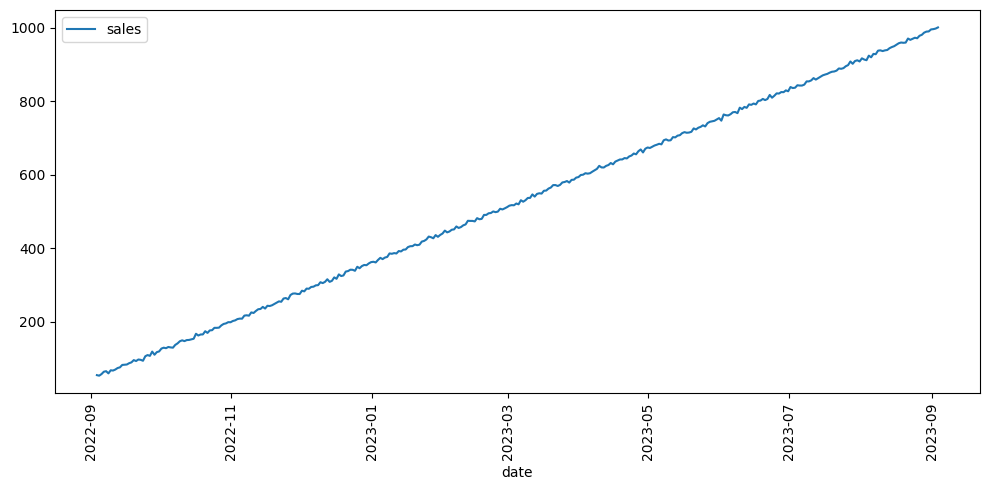

In [4]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 2. Trend analysis<a class="anchor" id="c2"></a>

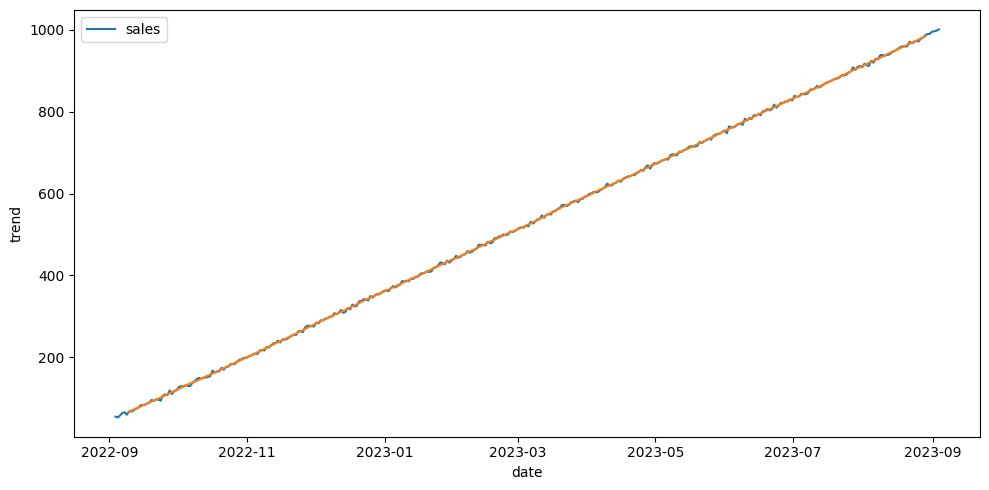

In [7]:
decomp = seasonal_decompose(df, period = 12)

plt.figure(figsize=(10,5))
sns.lineplot(df)
sns.lineplot(decomp.trend)
plt.tight_layout()
plt.show()

#### 3. Seasonality analysis<a class="anchor" id="c3"></a>

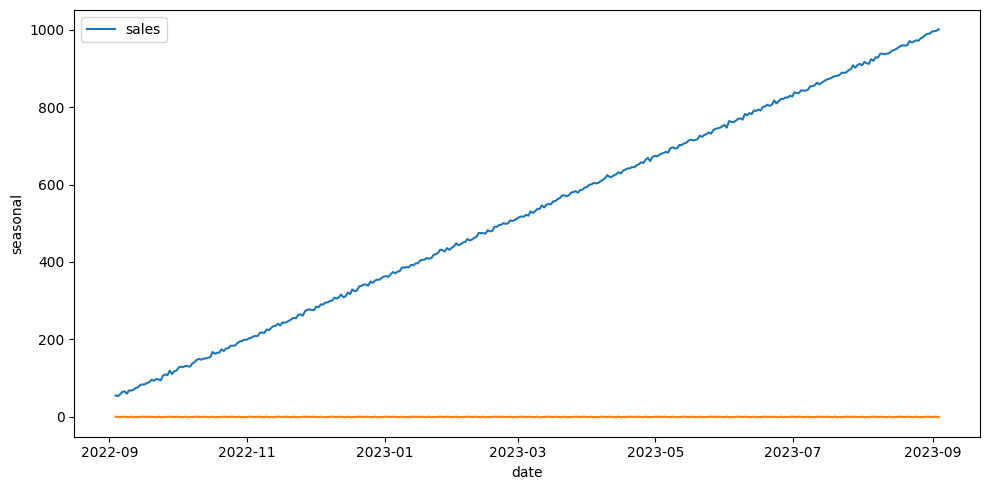

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(df)
sns.lineplot(decomp.seasonal)
plt.tight_layout()
plt.show()

In [10]:
def dickey_fuller_test(df):
    print('Dickey-Fuller test results:')
    dftest = adfuller(df, autolag = "AIC")
    adf_test = pd.Series(dftest[0:4], index=["Test Statistic:", "p-value:", "#Lags Used:", "Number of Observations Used:"])
    for key, value in dftest[4].items():
        adf_test[f'Critical value {key}:'] = value
    return adf_test

In [11]:
dickey_fuller_test(df)

Dickey-Fuller test results:


Test Statistic:                   0.545414
p-value:                          0.986190
#Lags Used:                      13.000000
Number of Observations Used:    352.000000
Critical value 1%:               -3.449065
Critical value 5%:               -2.869786
Critical value 10%:              -2.571163
dtype: float64

#### 4. Variability Analysis<a class="anchor" id="c4"></a>

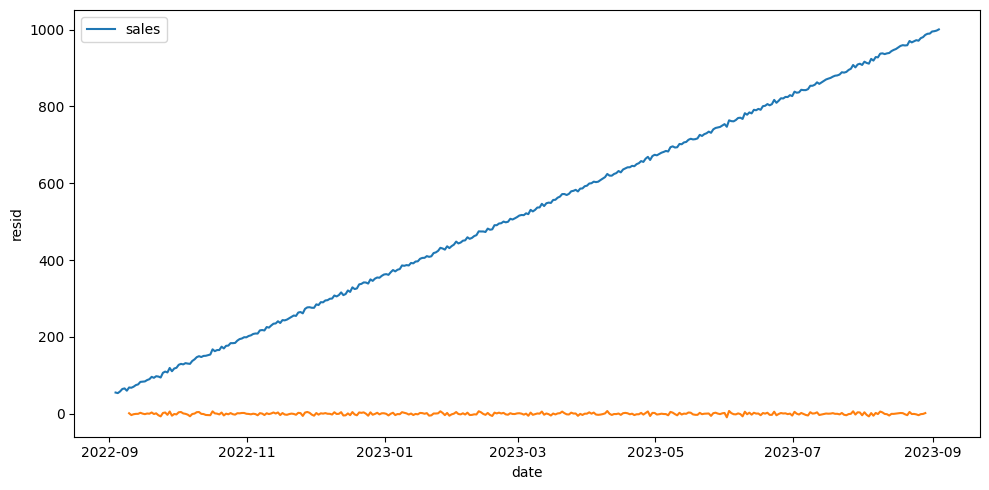

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(df)
sns.lineplot(decomp.resid)
plt.tight_layout()
plt.show()

#### 5. Autocorrelation analysis<a class="anchor" id="c5"></a>

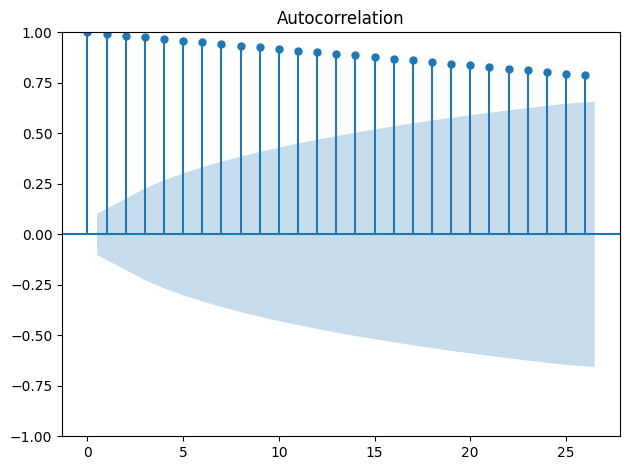

In [15]:
plot_acf(df)
plt.tight_layout()
plt.show()

## Machine Learning

### 6. ARIMA Model Training<a class="anchor" id="c6"></a>

In [36]:
model = auto_arima(df, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.859 seconds


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Mon, 02 Dec 2024   AIC                           1839.552
Time:                        15:21:08   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 6.1 Model Prediction <a id="s61"></a>

In [40]:
forecast = model.predict(60)

plt.figure(figsize=(10,5))
sns.lineplot(df)
sns.lineplot(forecast, c='red', label='forecast')
plt.tight_layout()
plt.show()

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831668
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217253
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206408
2023-09-15 17:10:08.079328    1030.804239
2023-09-16 17:10:08.079328    1033.402071
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
2023-09-24 17:10:08.079328    1054.184719
2023-09-25 17:10:08.079328    1056.782550
2023-09-26 17:10:08.079328    1059.380381
2023-09-27 17:10:08.079328    1061